In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla

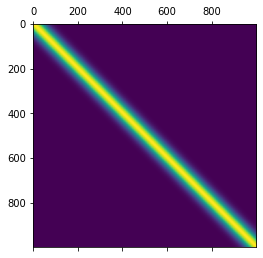

In [40]:
xx = np.linspace(-15,15,1000)
N = len(xx)
L = 1.0
C = 1.0**2

C_gauss = np.zeros((N,N))
for ii in range(N):
    r = np.abs(xx[ii] - xx)
    C_gauss[:,ii] = 1./C * np.exp(-0.5 * r**2 / L**2) # 1D: Sigma = [L^2]

plt.matshow(C_gauss)

plt.figure()
plt.plot(xx, C_gauss[0,:])
plt.plot(xx, C_gauss[100,:])
plt.plot(xx, C_gauss[500,:])

In [42]:
sqrt_C_Gauss = sla.sqrtm(C_gauss).real

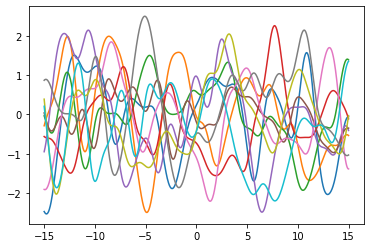

In [51]:
num_samples = int(1e1)
samples = np.zeros((num_samples,N))
for ii in range(num_samples):
    samples[ii,:] = np.dot(sqrt_C_Gauss, np.random.randn(N))
    
for ii in range(num_samples):
    plt.plot(xx, samples[ii,:])

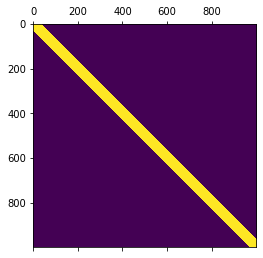

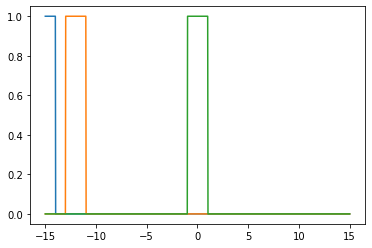

In [53]:
xx = np.linspace(-15,15,1000)
N = len(xx)
L = 1.0
C = 1.0**2

C_box = np.zeros((N,N))
for ii in range(N):
    r = np.abs(xx[ii] - xx)
    C_box[:,ii] = 1./C * (r < L)

plt.matshow(C_box)

plt.figure()
plt.plot(xx, C_box[0,:])
plt.plot(xx, C_box[100,:])
plt.plot(xx, C_box[500,:])

In [56]:
sqrt_C_box = sla.sqrtm(C_box).real

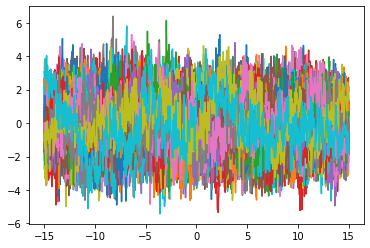

In [93]:
num_samples = int(1e2)
samples = np.zeros((num_samples,N))
for ii in range(num_samples):
    samples[ii,:] = np.dot(sqrt_C_box, np.random.randn(N))
    
for ii in range(num_samples):
    plt.plot(xx, samples[ii,:])

In [58]:
np.linalg.cond(C_box)

1.1872957332425595e+18

In [50]:
np.linalg.cond(C_gauss)

4.799409205314428e+19

In [45]:
import dolfin as dl

In [80]:
mesh = dl.IntervalMesh(500, -50, 50)
dl.plot(mesh)
# mesh.coordinates()

Vh = dl.FunctionSpace(mesh, 'CG', 1)

stiffness_form = dl.inner(dl.grad(dl.TestFunction(Vh)), dl.grad(dl.TrialFunction(Vh))) * dl.dx
mass_form = dl.TestFunction(Vh) * dl.TrialFunction(Vh) * dl.dx

K_petsc = dl.assemble(stiffness_form)
M_petsc = dl.assemble(mass_form)

K = K_petsc.array()
M = M_petsc.array()

gamma = 8.0
alpha = 2.0
A = gamma * K + alpha * M
inv_C = A @ np.linalg.inv(M) @ A
C = np.linalg.inv(inv_C)

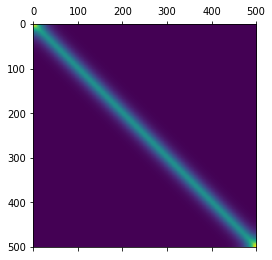

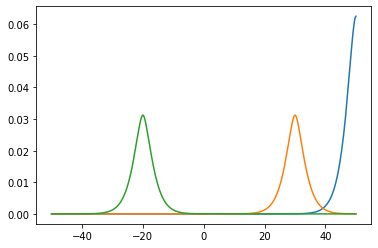

In [81]:
plt.matshow(C)

plt.figure()
plt.plot(dof_coords, C[0,:])
plt.plot(dof_coords, C[100,:])
plt.plot(dof_coords, C[350,:])

In [92]:
# L = sqrt(8(p - d / 2)) sqrt( gamma/alpha )
# gamma/alpha = L^2 / (8(p - d / 2))
# p = power; (gamma K + alpha)^p
# d = spatial dimension
L = np.sqrt(8. * (2. - 1. / 2.)) * np.sqrt( gamma/alpha )
print('L=', L)

L= 6.928203230275509


In [82]:
sqrt_C = sla.sqrtm(C).real

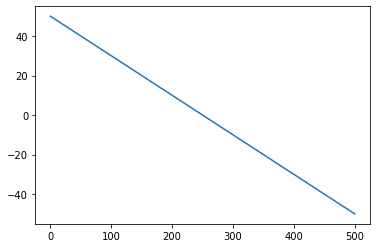

In [83]:
dof_coords = Vh.tabulate_dof_coordinates()
plt.plot(dof_coords)

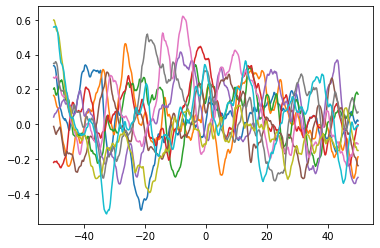

In [96]:
num_samples = int(1e1)
samples = np.zeros((num_samples,Vh.dim()))
for ii in range(num_samples):
    samples[ii,:] = np.dot(sqrt_C, np.random.randn(Vh.dim()))
    
for ii in range(num_samples):
    plt.plot(dof_coords, samples[ii,:])